In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('shopping_data.csv')

In [3]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
df.shape

(200, 5)

In [6]:
df.columnsns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [7]:
df1 = df.drop(['CustomerID', 'Gender', 'Age'],axis=1)

In [8]:
df1.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


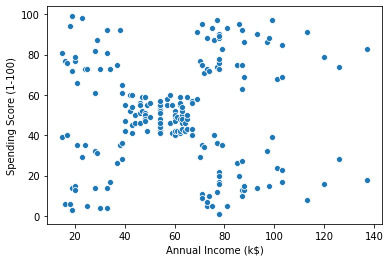

In [15]:
sns.scatterplot(x='Annual Income (k$)',y='Spending Score (1-100)',data=df1)
plt.show()

In [19]:
from sklearn.cluster import KMeans
from scipy.stats import zscore

In [20]:
df_scaled = df1.apply(zscore)

In [21]:
df_scaled.head()

,Annual Income (k$),Spending Score (1-100)
0,-1.738999,-0.434801
1,-1.738999,1.195704
2,-1.700830,-1.715913
3,-1.700830,1.040418
4,-1.662660,-0.395980


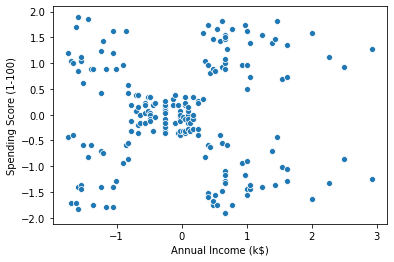

In [22]:
sns.scatterplot(x='Annual Income (k$)',y='Spending Score (1-100)',data=df_scaled)
plt.show()

In [31]:
# finding the number of clusters
cluster_range = range(1,15)
print(cluster_range)

cluster_errors = []

for num_clusters in cluster_range:
    clusters = KMeans(num_clusters)
    clusters.fit(df_scaled)
    cluster_errors.append( clusters.inertia_ )
    
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )
clusters_df[0:15]



range(1, 15)


,num_clusters,cluster_errors
0,1,400.000000
1,2,270.155904
2,3,157.704008
3,4,108.921317
4,5,65.568408
5,6,55.103778
6,7,46.917117
7,8,37.228188
8,9,32.828029
9,10,29.196960


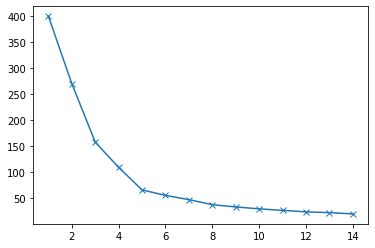

In [32]:
#Elbow plot
plt.plot(clusters_df.num_clusters, clusters_df.cluster_errors, marker='x')

In [49]:
final_clusters = KMeans(n_clusters=5,random_state=1)
final_clusters.fit(df_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=1, tol=0.0001, verbose=0)

In [35]:
list(df_scaled)

['Annual Income (k$)', 'Spending Score (1-100)']

In [50]:
centroid_df = pd.DataFrame(final_clusters.cluster_centers_, columns = list(df_scaled) )
centroid_df.head()

,Annual Income (k$),Spending Score (1-100)
0,-1.329545,1.132178
1,1.055003,-1.284439
2,-0.200913,-0.026456
3,0.991583,1.239503
4,-1.307519,-1.136965


In [51]:
labels_df = pd.DataFrame(final_clusters.labels_ , columns = list(['labels']))
labels_df.head()

,labels
0,4
1,0
2,4
3,0
4,4


In [52]:
df1_labeled = df1.join(labels_df)

In [53]:
df1_labeled.head(10)

,Annual Income (k$),Spending Score (1-100),labels
0,15,39,4
1,15,81,0
2,16,6,4
3,16,77,0
4,17,40,4
5,17,76,0
6,18,6,4
7,18,94,0
8,19,3,4
9,19,72,0


C:\Users\Jayasuryan\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\Jayasuryan\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


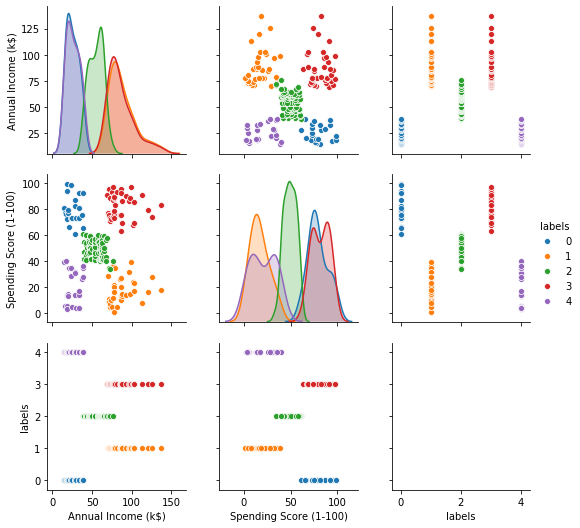

In [54]:
sns.pairplot(df1_labeled,hue='labels')
plt.show()

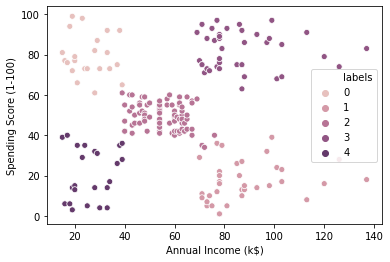

In [65]:
cmap = sns.cubehelix_palette(dark=.3, light=.8, as_cmap=True)
sns.scatterplot(x='Annual Income (k$)',y='Spending Score (1-100)',data=df1_labeled, hue='labels', palette=cmap, legend="full")
plt.show()

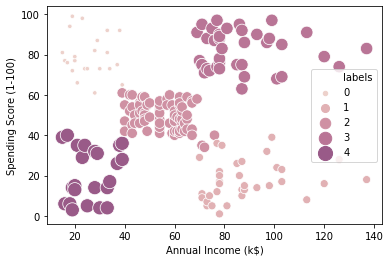

In [64]:
sns.scatterplot(x='Annual Income (k$)',y='Spending Score (1-100)',data=df1_labeled, hue='labels', size="labels",
                sizes=(20, 200), hue_norm=(0, 7),legend="full")
plt.show()

In [61]:
df1_labeled['labels'].value_counts()

2    81
3    39
1    35
4    23
0    22
Name: labels, dtype: int64

### Observation:

Majority people are from Middle-income.

The high income people though visiting shop and spending more, but no of people visitng is less(data is sparsed). So we can target them, depending on the call by the client.
